The similarities and differences between decision tree method and random forest method will be discussed based on nature, accuracy, speed and interpretability.

### Nature
The nature of decision tree and random forest is very similar since random forest is built on top of decision trees. They both uses a top-down approach to fit the data. Each tree in both methods starts at the root node where all samples are in one partition. The node is then split into two daughter nodes based on a split criterion. The nodes are split recursively as a binary operation until it reaches a threshold of maximum depth or minimum instance. The predicted value of a given node would be the average response of observations in that node. Unlike DNN, for both methods, each node selects one variable only for splitting at a discrete value. They can both be used for numerical and categorical features, as regressors or classifiers.
The difference between the two method is that random forest is a tree ensemble method. It is a collection of decision trees, using only a subset of samples (i.e. bootstrap samples) from the data for each tree and a subset of features for each split-point selection. A prediction made by random forest is done by taking the average result of all decision trees.
### Accuracy
In general, a random forest is more accurate than a decision tree. Decision trees often suffers from overfitting. The space is often partitioned to match the training dataset well but generates high variance in predictions. Although variance can be reduced by pruning the trees, it requires a trade-off of increased bias. Moreover, decison trees are not robust to small changes in data as they often result in altered split criterion.
Random forests usually have better prediction accuracies. Splits in decision trees are often influenced by a few important features. In random forest, feature selections are randomized in each node to reduce the correlation between trees. Although the prediction power of each tree is not high, taking the mean of all trees would produce a fairly accurate result with reduced overfitting.
### Speed
Depending on the parameters used, a decision tree and a random forest can have similar speed even though random forests have better accuracy. Although a random forest consists of a collection of trees, each tree only uses a subset of samples. The trees are smaller and simpler than a full decision tree. Hence, depending on parameters like the number of trees or maximum depth, random forest can be fast as well.

### Interpretability
A decision tree is more interpretable than a random forest. Decision trees have clear decision boundaries. The split criterion and samples in each node can be clearly illustrated by a tree diagram. If the space is 2D, the decision boundaries must be vertical or horizontal. On the other hand, random forest, like the other tree ensemble methods, is a black box model. The predictions are not directly explainable.


In [ ]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
np.random.seed(1234)

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        self.f_idxs = None
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            self.n_features = parent.n_features             #copies the number of features selected for split from the parent
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built


In [ ]:
def greedy_test(node, cost_fn): 
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #select a subset of features for the greedy test
    node.f_idxs = np.random.choice(num_features, node.n_features, replace=False)
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in node.f_idxs:
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value


In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2


In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
    def fit(self, data, labels ):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass
def fit(self, data, labels, f_idx, idxs):
    self.data = data
    self.labels = labels
    self.idxs = np.random.choice(data.shape[0], idxs, replace=False) # indexes of bootstrap samples of this tree
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(self.idxs, None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    self.root.n_features = f_idx # store the number of features selected for each split
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree
def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

### 2. Implementation

In [ ]:
class RandomForest():
    def __init__(self, depth=10, min_leaf=5, n_trees = 8, n_features='log2', sample_sz = 20, cost_fn =cost_misclassification):
        np.random.seed(12)
        self.depth, self.min_leaf = depth, min_leaf 
        self.n_trees = n_trees 
        self.sample_sz, self.n_features =  sample_sz, n_features
        self.cost_fn = cost_fn 
        self.trees = []
        self.num_classes = None
    def fit(self, x, y):
        #---------- fit training data with the help of function __create_tree__ -----# 
        # --- implete step 1 -------# 
        self.num_classes = np.max(y) + 1
        #obtain numerical value of n_features
        if self.n_features == 'log2':
          self.n_features = int(round(np.log2(x.shape[1]))) 
        elif self.n_features == 'sqrt':
          self.n_features = int(round(np.sqrt(x.shape[1])))
        #create an array of trees
        self.trees = [self.__create_tree__() for i in range(self.n_trees)]
        #fit each tree with different subsets of instances and features
        for tree in self.trees:
          tree.fit(x, y, self.n_features, self.sample_sz)
        return self
    def __create_tree__(self):
        #---------- create and return one decision tree ---------------------#
        #---  implete (a) and (b) of step 1 in random forest the algorithm in this python method ---- # 
        return DecisionTree(max_depth=self.depth, cost_fn=self.cost_fn, min_leaf_instances=self.min_leaf) 
        
    def predict(self, x):
        #---------- return the predicted probability for test data ----------#  
        return  sum([tree.predict(x) for tree in self.trees])/self.n_trees


### Part 3 experiments and visualization. 

In [ ]:
## Load data
from sklearn import datasets
dataset = datasets.load_iris()
x, y = dataset['data'], dataset['target']
(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)
x_train, y_train = x[inds[:100]], y[inds[:100]]
x_test, y_test = x[inds[100:]], y[inds[100:]]

In [ ]:
#----- (1) fit the tree to the training data and predict on the test data. ---## 
forest = RandomForest(cost_fn=cost_gini_index)
probs_test = forest.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'The test accuracy is {accuracy*100:.1f}.')

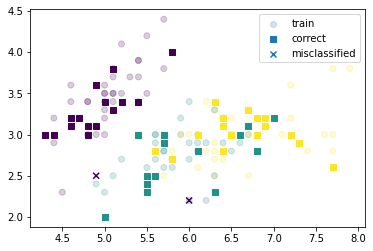

In [ ]:
# ----(2) visualization for results ------------------------------------------ 
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker=',', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

The intention of this post is to make students and ourselves more familiar with the general working of random forests for it’s better application and debugging in future. Random forests have many more parameters and associated complexities that could not be covered in a single post by me. To study a more robust and wholesome code I suggest you read the sklearn module’s random forest code which is open source. 

